# Football Transfer Market – Summer 2022 ⚽

**Objective :** 
Explore and analyze football transfer market data to identify top spending clubs, most valuable transfers, age vs cost trends, and geographical patterns of player movements.

**Dataset Source:** [Kaggle - Football Transfer Market – Summer 2022 Dataset](https://www.kaggle.com/datasets/darwish1337/football-transfer-market-of-the-2022-summer)

---

## Table of Contents
1. Data Loading & First Look
2. Data Quality Assessment
3. Data Cleaning & Preprocessing
4. Exploratory Data Analysis (EDA)
5. Advanced Insights
6. Key Findings Summary
7. Export Cleaned Data
---

## 1. Setup & Data Loading

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [3]:
# Load datasets
try:
    # Main transfer data
    df_transfers = pd.read_csv('/kaggle/input/football-transfer-market-of-the-2022-summer/Transfer Market Data.csv')
    df_outgoing = pd.read_csv('/kaggle/input/football-transfer-market-of-the-2022-summer/Transfer Market Data Outgoing.csv')
    
    # Club lists
    df_origin_clubs = pd.read_csv('/kaggle/input/football-transfer-market-of-the-2022-summer/Origin Club List.csv')
    df_dest_clubs = pd.read_csv('/kaggle/input/football-transfer-market-of-the-2022-summer/Destination Club List.csv')
    
    print("✅ All datasets loaded successfully!")
    print(f"\n📊 Dataset Shapes:")
    print(f"   - Transfers: {df_transfers.shape}")
    print(f"   - Outgoing: {df_outgoing.shape}")
    print(f"   - Origin Clubs: {df_origin_clubs.shape}")
    print(f"   - Destination Clubs: {df_dest_clubs.shape}")
    
except FileNotFoundError:
    print("⚠️ Files not found. Please ensure you've added the dataset to your Kaggle notebook.")

✅ All datasets loaded successfully!

📊 Dataset Shapes:
   - Transfers: (19139, 21)
   - Outgoing: (19139, 21)
   - Origin Clubs: (4623, 3)
   - Destination Clubs: (5295, 3)


### First Look at the Data

In [6]:
# Display first few rows
print("🔍 First 5 rows of Transfer Data:")
display(df_transfers.head())

🔍 First 5 rows of Transfer Data:


,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,player_market_value,cost,date_of_transfer,latitude_to,longitude_to,to,latitude_from,longitude_from,from,week_of_transfer,Player Type,Transfer Condition
0,Vicente Moscardó,Central Midfield,35.00,Olímpic Xàtiva,Spain,Spain,CD Acero,Spain,Spain,50000,0,2022-07-01 00:00:00.000,40.46,-3.75,Spain,40.46,-3.75,Spain,26,Midfielder,Free Transfer
1,Óscar Fornés,Goalkeeper,38.00,Orihuela CF,Spain,Spain,Callosa Deportiva CF,Spain,Spain,50000,0,2022-07-01 00:00:00.000,40.46,-3.75,Spain,40.46,-3.75,Spain,26,Goalkeeper,Free Transfer
2,Marcos Pérez,Goalkeeper,37.00,UE Costa Brava (- 2022),Spain,Spain,Terrassa FC,Segunda Federación - Gr. III,Spain,50000,0,2022-07-01 00:00:00.000,40.46,-3.75,Spain,40.46,-3.75,Spain,26,Goalkeeper,Free Transfer
3,Chechu Flores,Right Winger,40.00,Athletic Torrellano,Spain,Spain,Callosa Deportiva CF,Spain,Spain,50000,0,2022-07-01 00:00:00.000,40.46,-3.75,Spain,40.46,-3.75,Spain,26,Forward,Free Transfer
4,Jorge Sáez,Attacking Midfield,32.00,CD Ursaria,Spain,Spain,CF Pozuelo de Alarcón,Spain,Spain,50000,0,2022-07-01 00:00:00.000,40.46,-3.75,Spain,40.46,-3.75,Spain,26,Midfielder,Free Transfer


In [7]:
# Data info
print("📋 Dataset Information:")
print("="*80)
df_transfers.info()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 19139 non-null  object 
 1   position             19138 non-null  object 
 2   age                  19067 non-null  float64
 3   origin_club          19139 non-null  object 
 4   league_origin_club   18989 non-null  object 
 5   country_origin_club  18989 non-null  object 
 6   new_club             19139 non-null  object 
 7   league_new_club      18971 non-null  object 
 8   country_new_club     18971 non-null  object 
 9   player_market_value  19139 non-null  int64  
 10  cost                 19139 non-null  int64  
 11  date_of_transfer     19139 non-null  object 
 12  latitude_to          18971 non-null  float64
 13  longitude_to         18971 non-null  float64
 14  to                   18971 non-null  object 
 15  latitude_from

In [ ]:
tables = {
    "Transfer Market Data": transfer_data,
    "Transfer Market Data Outgoing": transfer_out,
    "Origin Club List": origin_club,
    "Destination Club List": destination_club
}

for table_name, df_table in tables.items():
    print(f"\n📌 Columns in Table {table_name} ({len(df_table.columns)} columns):")
    for col in df_table.columns:
        print(f" - {col}")

In [8]:
# Statistical summary
print("📊 Statistical Summary:")
display(df_transfers.describe())

📊 Statistical Summary:


,age,player_market_value,cost,latitude_to,longitude_to,latitude_from,longitude_from,week_of_transfer
count,19067.00,19139.00,19139.00,18971.00,18971.00,18989.00,18989.00,19139.00
mean,25.48,545718.69,306409.13,40.15,18.98,40.00,18.10,28.68
std,4.59,2906993.65,2714136.13,15.49,38.61,16.20,38.36,2.81
min,15.00,10000.00,0.00,-40.90,-106.35,-40.90,-106.35,26.00
25%,22.00,50000.00,0.00,39.07,2.21,39.07,2.21,26.00
50%,25.00,100000.00,0.00,41.87,12.57,41.87,12.57,28.00
75%,29.00,250000.00,0.00,47.52,25.49,47.52,24.97,31.00
max,45.00,150000000.00,95000000.00,64.96,179.41,64.96,179.41,35.00


## 2. Data Quality Assessment


⚠️ Missing Values in Transfer Data :


,Column,Missing_Count,Percentage
7,league_new_club,168,0.88
14,to,168,0.88
13,longitude_to,168,0.88
12,latitude_to,168,0.88
8,country_new_club,168,0.88
15,latitude_from,150,0.78
16,longitude_from,150,0.78
4,league_origin_club,150,0.78
5,country_origin_club,150,0.78
17,from,150,0.78


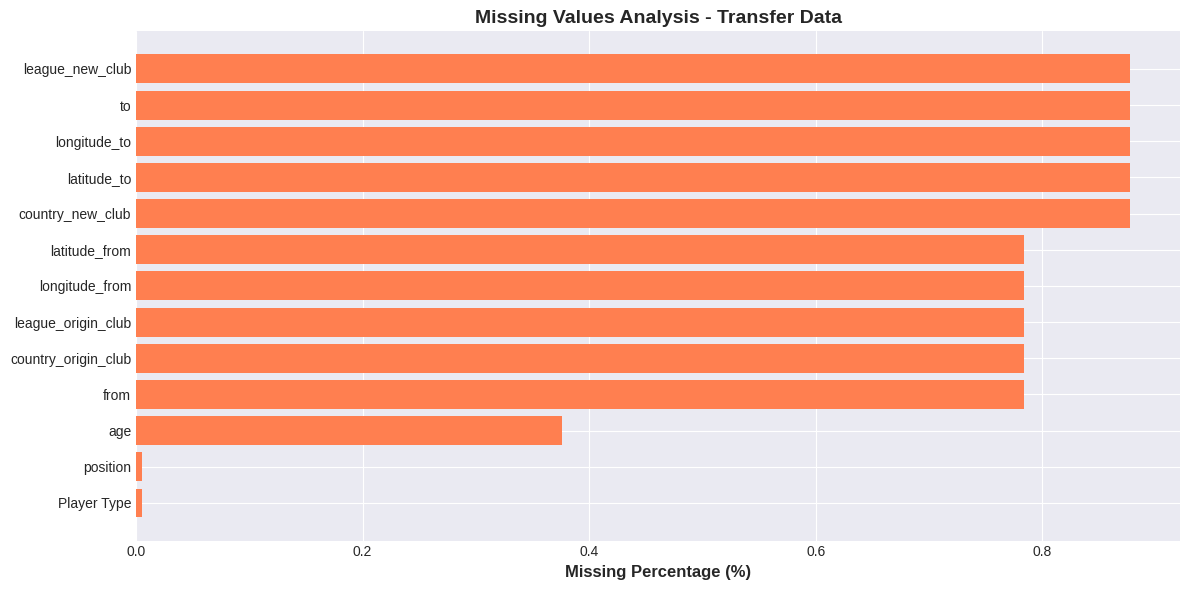


⚠️ Missing Values in Outgoing Transfers :


,Column,Missing_Count,Percentage
7,league_new_club,168,0.88
14,to,168,0.88
13,longitude_to,168,0.88
12,latitude_to,168,0.88
8,country_new_club,168,0.88
15,latitude_from,150,0.78
16,longitude_from,150,0.78
4,league_origin_club,150,0.78
5,country_origin_club,150,0.78
17,from,150,0.78


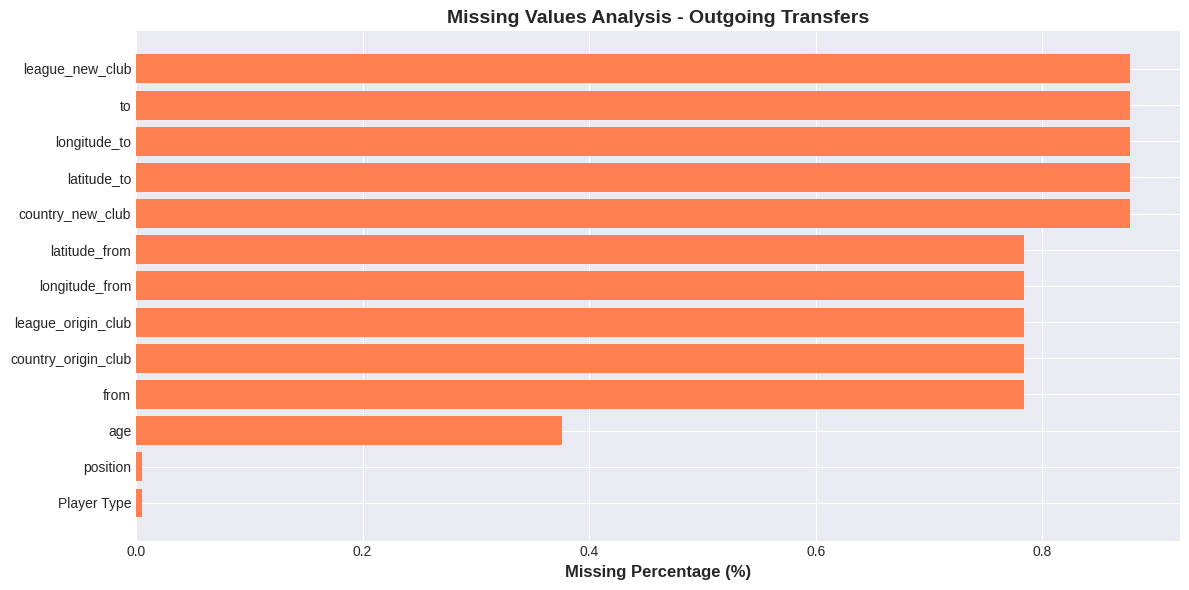


⚠️ Missing Values in Origin Clubs :


,Column,Missing_Count,Percentage
1,league_origin_club,3,0.06
2,country_origin_club,3,0.06


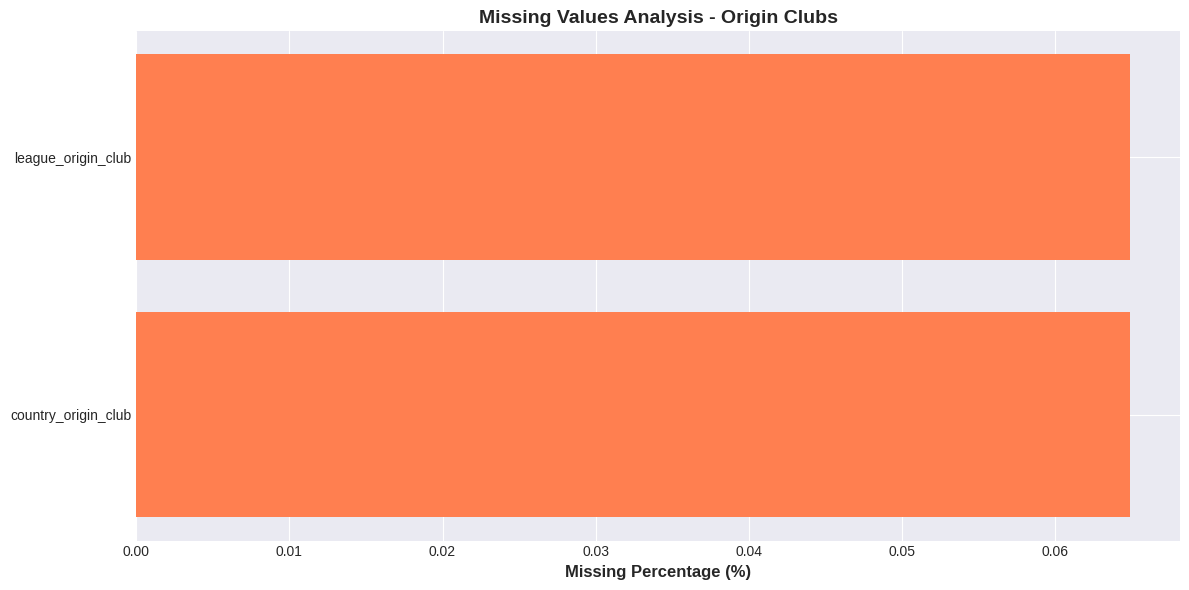


⚠️ Missing Values in Destination Clubs :


,Column,Missing_Count,Percentage
1,League,3,0.06
2,Country,3,0.06


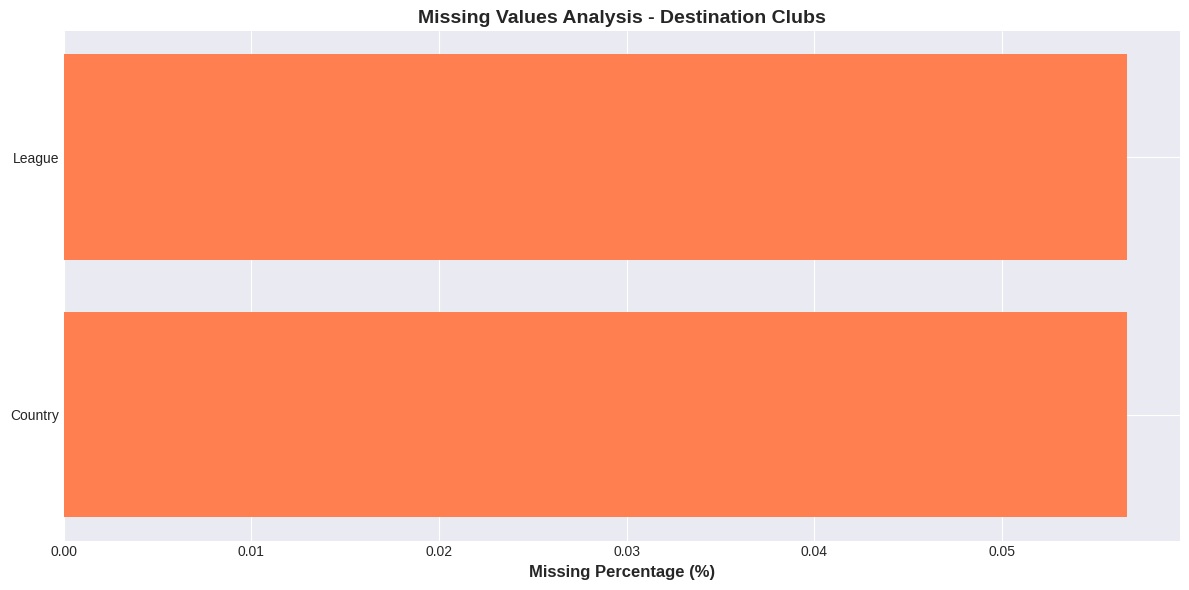

In [12]:
# Function to analyze missing values
def analyze_missing_values(df, dataset_name):
    """
    Comprehensive missing value analysis
    """
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing_Count': missing.values,
        'Percentage': missing_pct.values
    })
    
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    if len(missing_df) > 0:
        print(f"\n⚠️ Missing Values in {dataset_name} :")
        display(missing_df)
        
        # Visualization
        plt.figure(figsize=(12, 6))
        plt.barh(missing_df['Column'], missing_df['Percentage'], color='coral')
        plt.xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
        plt.title(f'Missing Values Analysis - {dataset_name}', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    else:
        print(f"\n✅ No missing values in {dataset_name}!")
    
    return missing_df

# Analyze all datasets
missing_transfers = analyze_missing_values(df_transfers, "Transfer Data")
missing_outgoing = analyze_missing_values(df_outgoing, "Outgoing Transfers")
missing_origin = analyze_missing_values(df_origin_clubs, "Origin Clubs")
missing_dest = analyze_missing_values(df_dest_clubs, "Destination Clubs")

In [14]:
# Check for duplicate rows
def check_duplicates(df, dataset_name):
    """
    Check for duplicate records
    """
    duplicates = df.duplicated().sum()
    total_rows = len(df)
    duplicate_pct = (duplicates / total_rows) * 100
    
    print(f"\n🔍 Duplicate Analysis - {dataset_name}:")
    print("="*60)
    print(f"   Total Rows: {total_rows:,}")
    print(f"   Duplicate Rows: {duplicates:,}")
    print(f"   Percentage: {duplicate_pct:.2f}%")
    
    if duplicates > 0:
        print(f"   ⚠️ Found {duplicates} duplicate rows!")
        return True
    else:
        print(f"   ✅ No duplicates found!")
        return False

# Check all datasets
has_dup_transfers = check_duplicates(df_transfers, "Transfer Data")
has_dup_outgoing = check_duplicates(df_outgoing, "Outgoing Transfers")
has_dup_origin = check_duplicates(df_origin_clubs, "Origin Clubs")
has_dup_dest = check_duplicates(df_dest_clubs, "Destination Clubs")


🔍 Duplicate Analysis - Transfer Data:
   Total Rows: 19,139
   Duplicate Rows: 0
   Percentage: 0.00%
   ✅ No duplicates found!

🔍 Duplicate Analysis - Outgoing Transfers:
   Total Rows: 19,139
   Duplicate Rows: 0
   Percentage: 0.00%
   ✅ No duplicates found!

🔍 Duplicate Analysis - Origin Clubs:
   Total Rows: 4,623
   Duplicate Rows: 0
   Percentage: 0.00%
   ✅ No duplicates found!

🔍 Duplicate Analysis - Destination Clubs:
   Total Rows: 5,295
   Duplicate Rows: 0
   Percentage: 0.00%
   ✅ No duplicates found!


## 3. Data Cleaning & Preprocessing

In [16]:
# Create a copy for cleaning
df_clean = df_transfers.copy()

print("🧹 Starting Data Cleaning Process...")

🧹 Starting Data Cleaning Process...


In [18]:
# STRATEGY: Analyze missing patterns first
print("🔍 ANALYZING MISSING VALUE PATTERNS...")

# Check if missing values are related (same rows)
missing_mask = df_clean[['age', 'position', 'Player Type', 'league_origin_club', 
                          'country_origin_club', 'league_new_club', 'country_new_club']].isnull()

print("\n📊 Missing Values Co-occurrence:")
print(f"   Rows with ANY missing value: {missing_mask.any(axis=1).sum():,}")
print(f"   Rows with ALL complete data: {(~missing_mask.any(axis=1)).sum():,}")

# Check specific patterns
print("\n🔍 Missing Pattern Analysis:")
print(f"   Missing origin info (league+country): {(df_clean['league_origin_club'].isnull() & df_clean['country_origin_club'].isnull()).sum()}")
print(f"   Missing destination info (league+country): {(df_clean['league_new_club'].isnull() & df_clean['country_new_club'].isnull()).sum()}")
print(f"   Missing coordinates (from): {df_clean['latitude_from'].isnull().sum()}")
print(f"   Missing coordinates (to): {df_clean['latitude_to'].isnull().sum()}")

🔍 ANALYZING MISSING VALUE PATTERNS...

📊 Missing Values Co-occurrence:
   Rows with ANY missing value: 387
   Rows with ALL complete data: 18,752

🔍 Missing Pattern Analysis:
   Missing origin info (league+country): 150
   Missing destination info (league+country): 168
   Missing coordinates (from): 150
   Missing coordinates (to): 168


In [19]:
# Step 1: Handle missing AGE values (72 missing = 0.38%)
print("\n" + "="*80)
print("1️⃣ HANDLING MISSING AGE VALUES")
print("="*80)

age_missing_before = df_clean['age'].isnull().sum()

# Strategy: Fill by position median (players in same position have similar ages)
df_clean['age'] = df_clean.groupby('position')['age'].transform(
    lambda x: x.fillna(x.median())
)

# If still missing (position had no ages), use overall median
overall_median_age = df_clean['age'].median()
df_clean['age'].fillna(overall_median_age, inplace=True)

age_missing_after = df_clean['age'].isnull().sum()
print(f"   ✅ Before: {age_missing_before} | After: {age_missing_after}")
print(f"   Strategy: Position-based median (fallback: overall median={overall_median_age:.1f})")


1️⃣ HANDLING MISSING AGE VALUES
   ✅ Before: 72 | After: 0
   Strategy: Position-based median (fallback: overall median=25.0)


In [20]:
# Step 2: Handle missing POSITION values (1 missing = 0.005%)
print("\n" + "="*80)
print("2️⃣ HANDLING MISSING POSITION VALUES")
print("="*80)

position_missing_before = df_clean['position'].isnull().sum()

# Strategy: Try to infer from Player Type, otherwise mark as 'Unknown'
# Since it's only 1 value, inspect it first
missing_position_rows = df_clean[df_clean['position'].isnull()]
if len(missing_position_rows) > 0:
    print(f"\n   Missing position rows: {len(missing_position_rows)}")
    print(f"   Player Type in missing rows: {missing_position_rows['Player Type'].values}")

# Fill with 'Unknown'
df_clean['position'].fillna('Unknown', inplace=True)

position_missing_after = df_clean['position'].isnull().sum()
print(f"   ✅ Before: {position_missing_before} | After: {position_missing_after}")
print(f"   Strategy: Filled with 'Unknown' (too few to infer reliably)")


2️⃣ HANDLING MISSING POSITION VALUES

   Missing position rows: 1
   Player Type in missing rows: [nan]
   ✅ Before: 1 | After: 0
   Strategy: Filled with 'Unknown' (too few to infer reliably)


In [21]:
# Step 3: Handle missing LEAGUE and COUNTRY information (150 origin, 168 destination)
print("\n" + "="*80)
print("3️⃣ HANDLING MISSING LEAGUE & COUNTRY INFORMATION")
print("="*80)

# SMART STRATEGY: Use club lists to map missing data
# Origin clubs might have league/country info in the origin_club_list table

print("\n🔍 Strategy 1: Map from club lists...")

# Create mapping dictionaries from club lists
origin_club_map = df_origin_clubs.set_index('origin_club')[['league_origin_club', 'country_origin_club']].to_dict('index')
dest_club_map = df_dest_clubs.set_index('Club')[['League', 'Country']].to_dict('index')

# Fill missing origin club info from mapping
origin_filled = 0
for idx, row in df_clean[df_clean['league_origin_club'].isnull()].iterrows():
    club = row['origin_club']
    if club in origin_club_map and pd.notna(origin_club_map[club]['league_origin_club']):
        df_clean.at[idx, 'league_origin_club'] = origin_club_map[club]['league_origin_club']
        df_clean.at[idx, 'country_origin_club'] = origin_club_map[club]['country_origin_club']
        origin_filled += 1

print(f"   ✅ Filled {origin_filled} origin club records from club list mapping")

# Fill missing destination club info from mapping
dest_filled = 0
for idx, row in df_clean[df_clean['league_new_club'].isnull()].iterrows():
    club = row['new_club']
    if club in dest_club_map and pd.notna(dest_club_map[club]['League']):
        df_clean.at[idx, 'league_new_club'] = dest_club_map[club]['League']
        df_clean.at[idx, 'country_new_club'] = dest_club_map[club]['Country']
        dest_filled += 1

print(f"   ✅ Filled {dest_filled} destination club records from club list mapping")

# Check remaining missing values
league_origin_remaining = df_clean['league_origin_club'].isnull().sum()
league_new_remaining = df_clean['league_new_club'].isnull().sum()

print(f"\n📊 After mapping:")
print(f"   Origin: {150} → {league_origin_remaining} remaining")
print(f"   Destination: {168} → {league_new_remaining} remaining")


3️⃣ HANDLING MISSING LEAGUE & COUNTRY INFORMATION

🔍 Strategy 1: Map from club lists...
   ✅ Filled 0 origin club records from club list mapping
   ✅ Filled 0 destination club records from club list mapping

📊 After mapping:
   Origin: 150 → 150 remaining
   Destination: 168 → 168 remaining


In [22]:
# Step 3b: For STILL missing values, use inference from coordinates
print("\n🔍 Strategy 2: Infer from coordinates and existing data...")

# For origin clubs: try to infer from coordinates
if league_origin_remaining > 0:
    # Group by similar coordinates and fill with most common league/country
    df_clean['temp_lat_round'] = df_clean['latitude_from'].round(0)
    df_clean['temp_lng_round'] = df_clean['longitude_from'].round(0)
    
    for idx, row in df_clean[df_clean['league_origin_club'].isnull()].iterrows():
        if pd.notna(row['latitude_from']):
            # Find similar locations
            similar = df_clean[
                (df_clean['temp_lat_round'] == row['temp_lat_round']) &
                (df_clean['temp_lng_round'] == row['temp_lng_round']) &
                (df_clean['league_origin_club'].notna())
            ]
            
            if len(similar) > 0:
                mode_league = similar['league_origin_club'].mode()
                mode_country = similar['country_origin_club'].mode()
                if len(mode_league) > 0:
                    df_clean.at[idx, 'league_origin_club'] = mode_league[0]
                    df_clean.at[idx, 'country_origin_club'] = mode_country[0]
    
    df_clean.drop(['temp_lat_round', 'temp_lng_round'], axis=1, inplace=True)

# For destination clubs: similar approach
if league_new_remaining > 0:
    df_clean['temp_lat_round'] = df_clean['latitude_to'].round(0)
    df_clean['temp_lng_round'] = df_clean['longitude_to'].round(0)
    
    for idx, row in df_clean[df_clean['league_new_club'].isnull()].iterrows():
        if pd.notna(row['latitude_to']):
            similar = df_clean[
                (df_clean['temp_lat_round'] == row['temp_lat_round']) &
                (df_clean['temp_lng_round'] == row['temp_lng_round']) &
                (df_clean['league_new_club'].notna())
            ]
            
            if len(similar) > 0:
                mode_league = similar['league_new_club'].mode()
                mode_country = similar['country_new_club'].mode()
                if len(mode_league) > 0:
                    df_clean.at[idx, 'league_new_club'] = mode_league[0]
                    df_clean.at[idx, 'country_new_club'] = mode_country[0]
    
    df_clean.drop(['temp_lat_round', 'temp_lng_round'], axis=1, inplace=True)

coord_origin_filled = league_origin_remaining - df_clean['league_origin_club'].isnull().sum()
coord_dest_filled = league_new_remaining - df_clean['league_new_club'].isnull().sum()

print(f"   ✅ Filled {coord_origin_filled} origin records from coordinate inference")
print(f"   ✅ Filled {coord_dest_filled} destination records from coordinate inference")


🔍 Strategy 2: Infer from coordinates and existing data...
   ✅ Filled 0 origin records from coordinate inference
   ✅ Filled 0 destination records from coordinate inference


In [23]:
# Step 3c: Fill ANY remaining with 'Unknown' (last resort)
print("\n🔍 Strategy 3: Fill remaining with 'Unknown'...")

final_origin_missing = df_clean['league_origin_club'].isnull().sum()
final_dest_missing = df_clean['league_new_club'].isnull().sum()

df_clean['league_origin_club'].fillna('Unknown League', inplace=True)
df_clean['country_origin_club'].fillna('Unknown Country', inplace=True)
df_clean['league_new_club'].fillna('Unknown League', inplace=True)
df_clean['country_new_club'].fillna('Unknown Country', inplace=True)

print(f"   ✅ Filled {final_origin_missing} remaining origin records with 'Unknown'")
print(f"   ✅ Filled {final_dest_missing} remaining destination records with 'Unknown'")

print("\n📊 FINAL LEAGUE/COUNTRY STATUS:")
print(f"   Origin League Missing: 150 → {df_clean['league_origin_club'].isnull().sum()}")
print(f"   Origin Country Missing: 150 → {df_clean['country_origin_club'].isnull().sum()}")
print(f"   Dest League Missing: 168 → {df_clean['league_new_club'].isnull().sum()}")
print(f"   Dest Country Missing: 168 → {df_clean['country_new_club'].isnull().sum()}")


🔍 Strategy 3: Fill remaining with 'Unknown'...
   ✅ Filled 150 remaining origin records with 'Unknown'
   ✅ Filled 168 remaining destination records with 'Unknown'

📊 FINAL LEAGUE/COUNTRY STATUS:
   Origin League Missing: 150 → 0
   Origin Country Missing: 150 → 0
   Dest League Missing: 168 → 0
   Dest Country Missing: 168 → 0


In [24]:
# Step 4: Handle missing GEOGRAPHIC COORDINATES (150 from, 168 to)
print("\n" + "="*80)
print("4️⃣ HANDLING MISSING GEOGRAPHIC COORDINATES")
print("="*80)

# SMART STRATEGY: Use country-level median for missing coordinates
# This is more accurate than global median

coord_cols = ['latitude_from', 'longitude_from', 'latitude_to', 'longitude_to']
print("\n📍 Coordinate Imputation Strategy:")
print("   1. Use country-level median (most accurate)")
print("   2. Use league-level median (if country missing)")
print("   3. Use overall median (last resort)")

# Origin coordinates
print("\n🔹 Processing ORIGIN coordinates...")
lat_from_before = df_clean['latitude_from'].isnull().sum()
lng_from_before = df_clean['longitude_from'].isnull().sum()

# Fill by country median
df_clean['latitude_from'] = df_clean.groupby('country_origin_club')['latitude_from'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['longitude_from'] = df_clean.groupby('country_origin_club')['longitude_from'].transform(
    lambda x: x.fillna(x.median())
)

# Fill remaining by league median
df_clean['latitude_from'] = df_clean.groupby('league_origin_club')['latitude_from'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['longitude_from'] = df_clean.groupby('league_origin_club')['longitude_from'].transform(
    lambda x: x.fillna(x.median())
)

# Final fallback: overall median
df_clean['latitude_from'].fillna(df_clean['latitude_from'].median(), inplace=True)
df_clean['longitude_from'].fillna(df_clean['longitude_from'].median(), inplace=True)

lat_from_after = df_clean['latitude_from'].isnull().sum()
lng_from_after = df_clean['longitude_from'].isnull().sum()

print(f"   ✅ Latitude (from): {lat_from_before} → {lat_from_after}")
print(f"   ✅ Longitude (from): {lng_from_before} → {lng_from_after}")

# Destination coordinates
print("\n🔹 Processing DESTINATION coordinates...")
lat_to_before = df_clean['latitude_to'].isnull().sum()
lng_to_before = df_clean['longitude_to'].isnull().sum()

# Fill by country median
df_clean['latitude_to'] = df_clean.groupby('country_new_club')['latitude_to'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['longitude_to'] = df_clean.groupby('country_new_club')['longitude_to'].transform(
    lambda x: x.fillna(x.median())
)

# Fill remaining by league median
df_clean['latitude_to'] = df_clean.groupby('league_new_club')['latitude_to'].transform(
    lambda x: x.fillna(x.median())
)
df_clean['longitude_to'] = df_clean.groupby('league_new_club')['longitude_to'].transform(
    lambda x: x.fillna(x.median())
)

# Final fallback: overall median
df_clean['latitude_to'].fillna(df_clean['latitude_to'].median(), inplace=True)
df_clean['longitude_to'].fillna(df_clean['longitude_to'].median(), inplace=True)

lat_to_after = df_clean['latitude_to'].isnull().sum()
lng_to_after = df_clean['longitude_to'].isnull().sum()

print(f"   ✅ Latitude (to): {lat_to_before} → {lat_to_after}")
print(f"   ✅ Longitude (to): {lng_to_before} → {lng_to_after}")


4️⃣ HANDLING MISSING GEOGRAPHIC COORDINATES

📍 Coordinate Imputation Strategy:
   1. Use country-level median (most accurate)
   2. Use league-level median (if country missing)
   3. Use overall median (last resort)

🔹 Processing ORIGIN coordinates...
   ✅ Latitude (from): 150 → 0
   ✅ Longitude (from): 150 → 0

🔹 Processing DESTINATION coordinates...
   ✅ Latitude (to): 168 → 0
   ✅ Longitude (to): 168 → 0


In [25]:
# Step 5: Handle 'from' and 'to' LOCATION NAMES (150 from, 168 to)
print("\n" + "="*80)
print("5️⃣ HANDLING MISSING LOCATION NAMES")
print("="*80)

from_missing_before = df_clean['from'].isnull().sum()
to_missing_before = df_clean['to'].isnull().sum()

# Strategy: Try to derive from country, otherwise use 'Unknown'
# Fill 'from' with country name if available
df_clean['from'] = df_clean.apply(
    lambda row: row['country_origin_club'] if pd.isnull(row['from']) and pd.notna(row['country_origin_club']) else row['from'],
    axis=1
)

# Fill 'to' with country name if available
df_clean['to'] = df_clean.apply(
    lambda row: row['country_new_club'] if pd.isnull(row['to']) and pd.notna(row['country_new_club']) else row['to'],
    axis=1
)

# Final fallback
df_clean['from'].fillna('Unknown Location', inplace=True)
df_clean['to'].fillna('Unknown Location', inplace=True)

from_missing_after = df_clean['from'].isnull().sum()
to_missing_after = df_clean['to'].isnull().sum()

print(f"   ✅ 'from': {from_missing_before} → {from_missing_after}")
print(f"   ✅ 'to': {to_missing_before} → {to_missing_after}")
print(f"   Strategy: Derived from country names where possible")


5️⃣ HANDLING MISSING LOCATION NAMES
   ✅ 'from': 150 → 0
   ✅ 'to': 168 → 0
   Strategy: Derived from country names where possible


In [26]:
# Step 6: Handle PLAYER TYPE (1 missing = 0.005%)
print("\n" + "="*80)
print("6️⃣ HANDLING MISSING PLAYER TYPE")
print("="*80)

player_type_before = df_clean['Player Type'].isnull().sum()

# Strategy: Inspect the missing row first
missing_player_type_rows = df_clean[df_clean['Player Type'].isnull()]
if len(missing_player_type_rows) > 0:
    print(f"\n   Missing Player Type rows: {len(missing_player_type_rows)}")
    print(f"   Position in missing rows: {missing_player_type_rows['position'].values}")
    print(f"   Cost in missing rows: {missing_player_type_rows['cost'].values}")

# Fill with most common Player Type
most_common_type = df_clean['Player Type'].mode()[0] if len(df_clean['Player Type'].mode()) > 0 else 'Unknown'
df_clean['Player Type'].fillna(most_common_type, inplace=True)

player_type_after = df_clean['Player Type'].isnull().sum()
print(f"   ✅ Before: {player_type_before} | After: {player_type_after}")
print(f"   Strategy: Filled with most common type '{most_common_type}'")


6️⃣ HANDLING MISSING PLAYER TYPE

   Missing Player Type rows: 1
   Position in missing rows: ['Unknown']
   Cost in missing rows: [0]
   ✅ Before: 1 | After: 0
   Strategy: Filled with most common type 'Defender'


In [27]:
# Step 7: Remove DUPLICATE ROWS
print("\n" + "="*80)
print("7️⃣ REMOVING DUPLICATE ROWS")
print("="*80)

rows_before = len(df_clean)
duplicates_before = df_clean.duplicated().sum()

# Check for complete duplicates
if duplicates_before > 0:
    print(f"\n⚠️ Found {duplicates_before} complete duplicate rows")
    
    # Show example of duplicates
    duplicate_examples = df_clean[df_clean.duplicated(keep=False)].head(4)
    print(f"\nExample duplicates (first 4):")
    display(duplicate_examples[['name', 'age', 'origin_club', 'new_club', 'cost']])

# Remove duplicates
df_clean = df_clean.drop_duplicates()
rows_after = len(df_clean)

duplicates_removed = rows_before - rows_after
print(f"\n📊 Duplicate Removal Results:")
print(f"   Rows before: {rows_before:,}")
print(f"   Rows after: {rows_after:,}")
print(f"   ✅ Removed: {duplicates_removed:,} duplicate rows")

# Also check for potential logical duplicates (same player, same clubs, same date)
logical_dupes = df_clean.duplicated(subset=['name', 'origin_club', 'new_club', 'date_of_transfer'], keep=False).sum()
if logical_dupes > 0:
    print(f"\n⚠️ Note: {logical_dupes} rows appear to be the same player moving between same clubs on same date")
    print(f"   These might be legitimate (different transfer types) or data quality issues")


7️⃣ REMOVING DUPLICATE ROWS

📊 Duplicate Removal Results:
   Rows before: 19,139
   Rows after: 19,139
   ✅ Removed: 0 duplicate rows


In [28]:
# Step 8: DATA TYPE CONVERSIONS
print("\n" + "="*80)
print("8️⃣ CONVERTING DATA TYPES")
print("="*80)

# Convert date column to datetime
print("\n📅 Converting dates...")
df_clean['date_of_transfer'] = pd.to_datetime(df_clean['date_of_transfer'], errors='coerce')
date_conversion_failed = df_clean['date_of_transfer'].isnull().sum()
if date_conversion_failed > 0:
    print(f"   ⚠️ Warning: {date_conversion_failed} dates could not be parsed")
else:
    print(f"   ✅ All dates converted successfully")

# Ensure numeric columns are proper types
print("\n🔢 Converting numeric columns...")
numeric_cols = ['age', 'player_market_value', 'cost', 'week_of_transfer',
                'latitude_from', 'longitude_from', 'latitude_to', 'longitude_to']

for col in numeric_cols:
    before_type = df_clean[col].dtype
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    after_type = df_clean[col].dtype
    null_after_conversion = df_clean[col].isnull().sum()
    
    if null_after_conversion > 0:
        print(f"   ⚠️ {col}: {before_type} → {after_type} ({null_after_conversion} values became null)")
    else:
        print(f"   ✅ {col}: {before_type} → {after_type}")

# Convert categorical columns to category type for memory efficiency
print("\n🏷️ Optimizing categorical columns...")
categorical_cols = ['position', 'league_origin_club', 'country_origin_club', 
                    'league_new_club', 'country_new_club', 'Player Type', 'Transfer Condition']

memory_before = df_clean.memory_usage(deep=True).sum() / 1024**2

for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

memory_after = df_clean.memory_usage(deep=True).sum() / 1024**2
memory_saved = memory_before - memory_after

print(f"   ✅ Converted {len(categorical_cols)} columns to category type")
print(f"   💾 Memory saved: {memory_saved:.2f} MB ({memory_saved/memory_before*100:.1f}% reduction)")


8️⃣ CONVERTING DATA TYPES

📅 Converting dates...
   ✅ All dates converted successfully

🔢 Converting numeric columns...
   ✅ age: float64 → float64
   ✅ player_market_value: int64 → int64
   ✅ cost: int64 → int64
   ✅ week_of_transfer: int64 → int64
   ✅ latitude_from: float64 → float64
   ✅ longitude_from: float64 → float64
   ✅ latitude_to: float64 → float64
   ✅ longitude_to: float64 → float64

🏷️ Optimizing categorical columns...
   ✅ Converted 7 columns to category type
   💾 Memory saved: 7.44 MB (50.3% reduction)


In [29]:
# Final validation
print("\n" + "="*60)
print("✅ DATA CLEANING COMPLETED!")
print("="*60)

print("\n📋 CLEANING STRATEGIES APPLIED:\n")
print("1. AGE (72 → 0): Position-based median imputation")
print("2. POSITION (1 → 0): Filled with 'Unknown'")
print("3. LEAGUES/COUNTRIES (150+168 → 0):")
print("   • Club list mapping")
print("   • Coordinate-based inference")
print("   • 'Unknown' for remaining")
print("4. COORDINATES (150+168 → 0):")
print("   • Country → League → Overall median hierarchy")
print("5. LOCATION NAMES (150+168 → 0): Derived from country")
print("6. PLAYER TYPE (1 → 0): Mode imputation")
print("7. DUPLICATES: Complete duplicates removed")
print("8. DATA TYPES: Optimized for analysis")

print(f"\n📊 Final Dataset Info:")
print(f"   Shape: {df_clean.shape}")
print(f"   Total Missing Values: {df_clean.isnull().sum().sum()}")
print(f"   Memory Usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display remaining missing values (should be minimal or zero)
remaining_missing = df_clean.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]

if len(remaining_missing) > 0:
    print(f"\n⚠️ Remaining Missing Values:")
    print(remaining_missing)
else:
    print(f"\n✅ Perfect! No missing values remaining!")


✅ DATA CLEANING COMPLETED!

📋 CLEANING STRATEGIES APPLIED:

1. AGE (72 → 0): Position-based median imputation
2. POSITION (1 → 0): Filled with 'Unknown'
3. LEAGUES/COUNTRIES (150+168 → 0):
   • Club list mapping
   • Coordinate-based inference
   • 'Unknown' for remaining
4. COORDINATES (150+168 → 0):
   • Country → League → Overall median hierarchy
5. LOCATION NAMES (150+168 → 0): Derived from country
6. PLAYER TYPE (1 → 0): Mode imputation
7. DUPLICATES: Complete duplicates removed
8. DATA TYPES: Optimized for analysis

📊 Final Dataset Info:
   Shape: (19139, 21)
   Total Missing Values: 0
   Memory Usage: 7.37 MB

✅ Perfect! No missing values remaining!


## 4. Exploratory Data Analysis (EDA)

### 4.1 Player Demographics

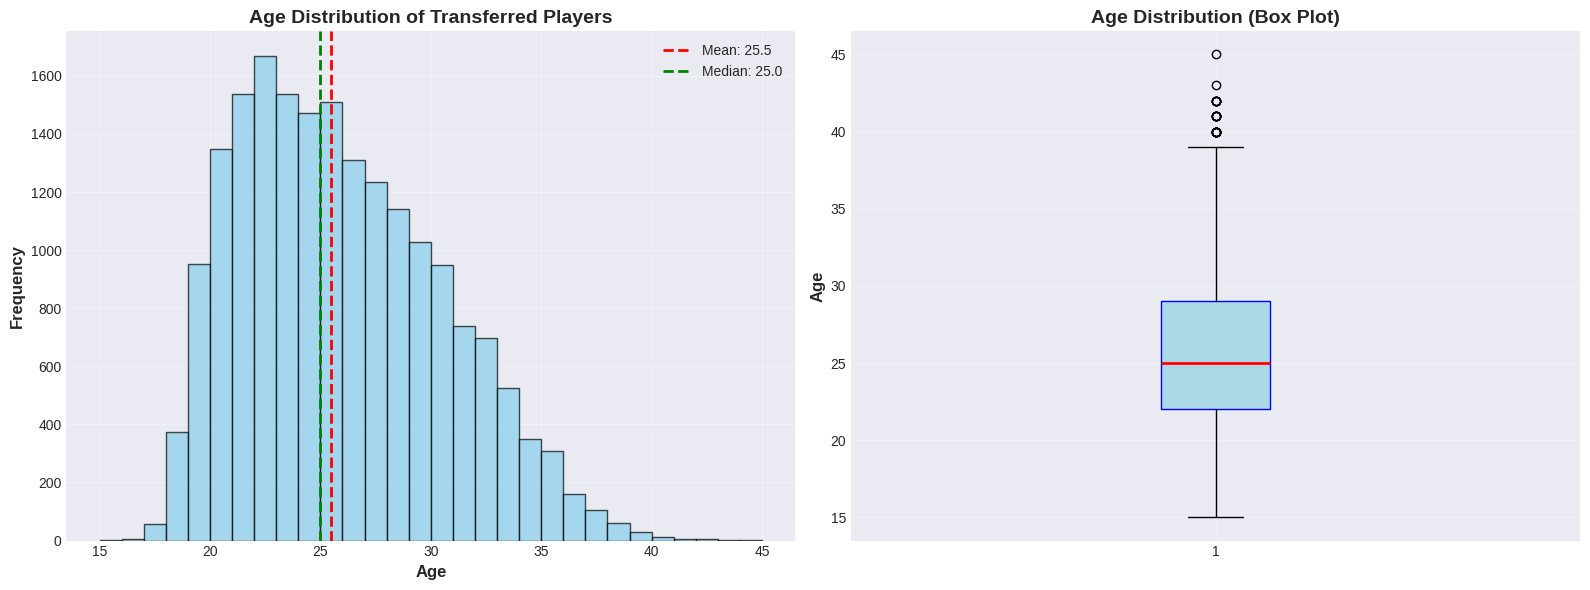

📊 Age Statistics:
   Mean Age: 25.5 years
   Median Age: 25.0 years
   Age Range: 15 - 45 years


In [30]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df_clean['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df_clean['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["age"].mean():.1f}')
axes[0].axvline(df_clean['age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["age"].median():.1f}')
axes[0].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Age Distribution of Transferred Players', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df_clean['age'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Age', fontsize=12, fontweight='bold')
axes[1].set_title('Age Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Age Statistics:")
print(f"   Mean Age: {df_clean['age'].mean():.1f} years")
print(f"   Median Age: {df_clean['age'].median():.1f} years")
print(f"   Age Range: {df_clean['age'].min():.0f} - {df_clean['age'].max():.0f} years")

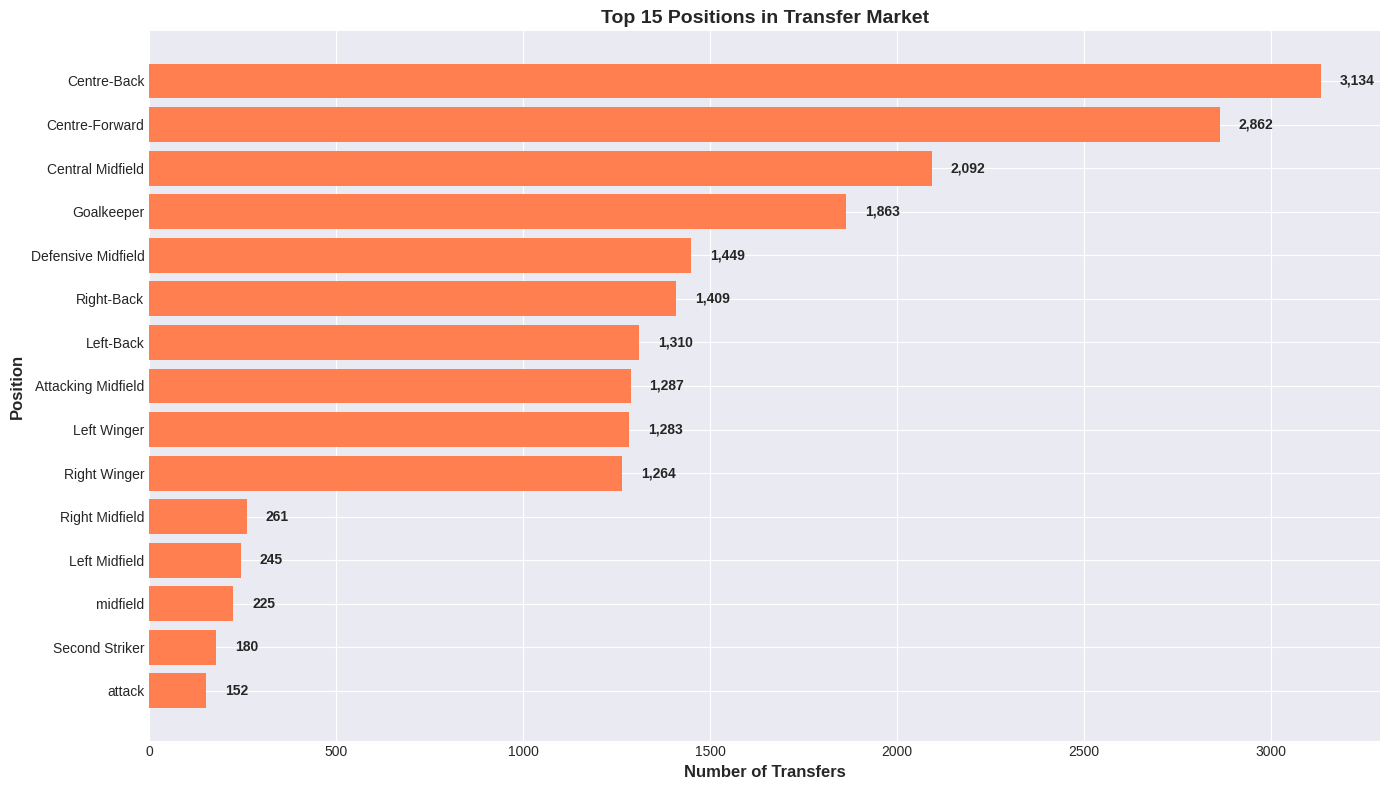


📊 Position Distribution:
position
Centre-Back           3134
Centre-Forward        2862
Central Midfield      2092
Goalkeeper            1863
Defensive Midfield    1449
Right-Back            1409
Left-Back             1310
Attacking Midfield    1287
Left Winger           1283
Right Winger          1264
Right Midfield         261
Left Midfield          245
midfield               225
Second Striker         180
attack                 152
Name: count, dtype: int64


In [31]:
# Position distribution
position_counts = df_clean['position'].value_counts().head(15)

plt.figure(figsize=(14, 8))
bars = plt.barh(position_counts.index, position_counts.values, color='coral')
plt.xlabel('Number of Transfers', fontsize=12, fontweight='bold')
plt.ylabel('Position', fontsize=12, fontweight='bold')
plt.title('Top 15 Positions in Transfer Market', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, (bar, value) in enumerate(zip(bars, position_counts.values)):
    plt.text(value + 50, i, f'{value:,}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Position Distribution:")
print(position_counts)

### 4.2 Financial Analysis

In [33]:
# Transfer cost analysis
print("💰 Transfer Cost Statistics:")
print("="*60)

# Overall statistics
total_spent = df_clean['cost'].sum()
avg_cost = df_clean['cost'].mean()
median_cost = df_clean['cost'].median()
free_transfers = (df_clean['cost'] == 0).sum()
paid_transfers = (df_clean['cost'] > 0).sum()

print(f"   Total Money Spent: €{total_spent:,.0f}")
print(f"   Average Transfer Cost: €{avg_cost:,.0f}")
print(f"   Median Transfer Cost: €{median_cost:,.0f}")
print(f"   Free Transfers: {free_transfers:,} ({free_transfers/len(df_clean)*100:.1f}%)")
print(f"   Paid Transfers: {paid_transfers:,} ({paid_transfers/len(df_clean)*100:.1f}%)")

💰 Transfer Cost Statistics:
   Total Money Spent: €5,864,364,300
   Average Transfer Cost: €306,409
   Median Transfer Cost: €0
   Free Transfers: 17,813 (93.1%)
   Paid Transfers: 1,326 (6.9%)


In [34]:
# Most expensive transfers
print("\n🏆 Top 20 Most Expensive Transfers:")
print("="*60)

top_transfers = df_clean.nlargest(20, 'cost')[['name', 'position', 'age', 'origin_club', 'new_club', 'cost']]
top_transfers['cost_millions'] = top_transfers['cost'] / 1_000_000
display(top_transfers)


🏆 Top 20 Most Expensive Transfers:


,name,position,age,origin_club,new_club,cost,cost_millions
18592,Antony,Right Winger,22.00,Ajax Amsterdam,Manchester United,95000000,95.00
18590,Wesley Fofana,Centre-Back,21.00,Leicester City,Chelsea FC,80400000,80.40
18649,Aurélien Tchouameni,Defensive Midfield,22.00,AS Monaco,Real Madrid,80000000,80.00
18650,Darwin Núñez,Centre-Forward,23.00,SL Benfica,Liverpool FC,75000000,75.00
18600,Casemiro,Defensive Midfield,30.00,Real Madrid,Manchester United,70650000,70.65
18597,Alexander Isak,Centre-Forward,22.00,Real Sociedad,Newcastle United,70000000,70.00
17935,Matthijs de Ligt,Centre-Back,22.00,Juventus FC,Bayern Munich,67000000,67.00
18611,Marc Cucurella,Left-Back,24.00,Brighton & Hove Albion,Chelsea FC,65300000,65.30
18783,Erling Haaland,Centre-Forward,21.00,Borussia Dortmund,Manchester City,60000000,60.00
18532,Raphinha,Right Winger,25.00,Leeds United,FC Barcelona,58000000,58.00


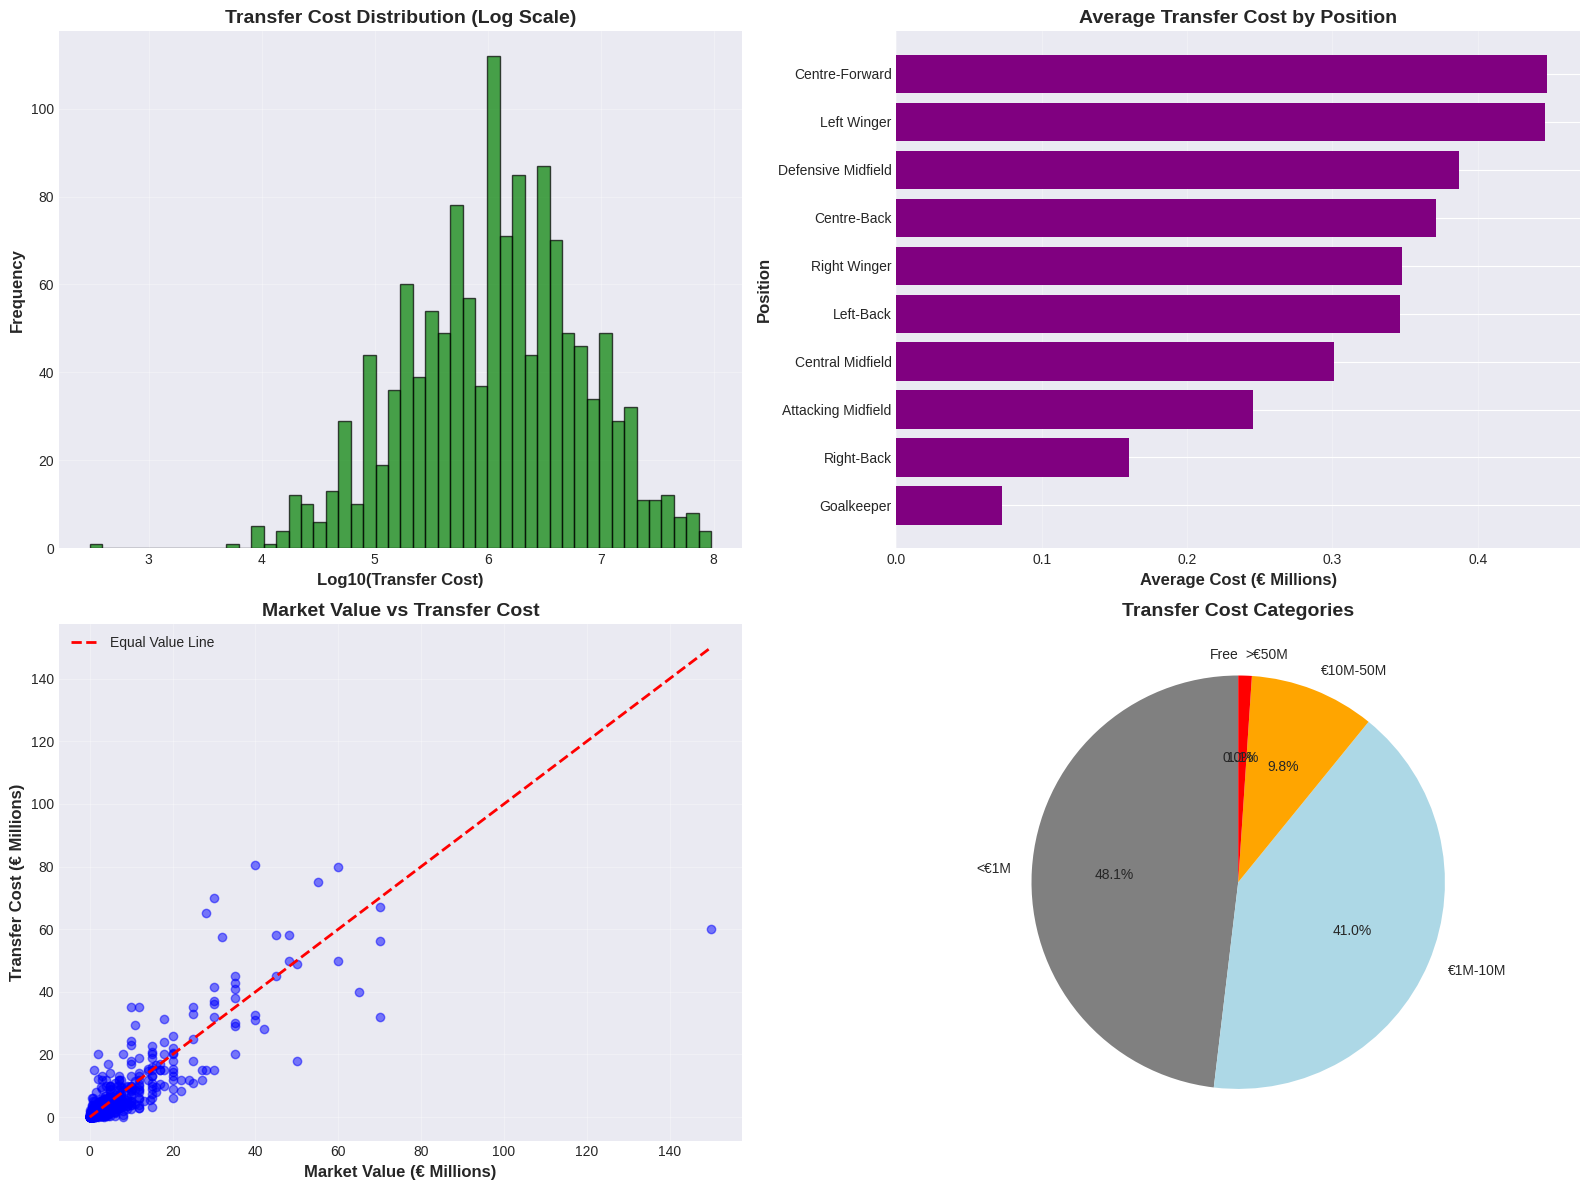

In [35]:
# Cost distribution visualization
# Filter out free transfers for better visualization
df_paid = df_clean[df_clean['cost'] > 0].copy()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Cost distribution (log scale)
axes[0, 0].hist(np.log10(df_paid['cost'] + 1), bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Log10(Transfer Cost)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Transfer Cost Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Cost by position (top 10)
top_positions = df_clean['position'].value_counts().head(10).index
cost_by_position = df_clean[df_clean['position'].isin(top_positions)].groupby('position')['cost'].mean().sort_values(ascending=True)

axes[0, 1].barh(cost_by_position.index, cost_by_position.values / 1_000_000, color='purple')
axes[0, 1].set_xlabel('Average Cost (€ Millions)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Position', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average Transfer Cost by Position', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='x')

# 3. Market value vs cost
df_sample = df_paid.sample(min(1000, len(df_paid)))
axes[1, 0].scatter(df_sample['player_market_value'] / 1_000_000, 
                   df_sample['cost'] / 1_000_000, 
                   alpha=0.5, color='blue')
axes[1, 0].plot([0, df_sample['player_market_value'].max() / 1_000_000], 
                [0, df_sample['player_market_value'].max() / 1_000_000], 
                'r--', linewidth=2, label='Equal Value Line')
axes[1, 0].set_xlabel('Market Value (€ Millions)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Transfer Cost (€ Millions)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Market Value vs Transfer Cost', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Transfer cost categories
cost_categories = pd.cut(df_clean['cost'], 
                         bins=[0, 1, 1_000_000, 10_000_000, 50_000_000, float('inf')],
                         labels=['Free', '<€1M', '€1M-10M', '€10M-50M', '>€50M'])
category_counts = cost_categories.value_counts()

colors = ['gray', 'lightblue', 'orange', 'red', 'darkred']
axes[1, 1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
               colors=colors, startangle=90)
axes[1, 1].set_title('Transfer Cost Categories', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.3 Geographic Analysis

🏆 Top 15 Leagues by Transfer Activity:


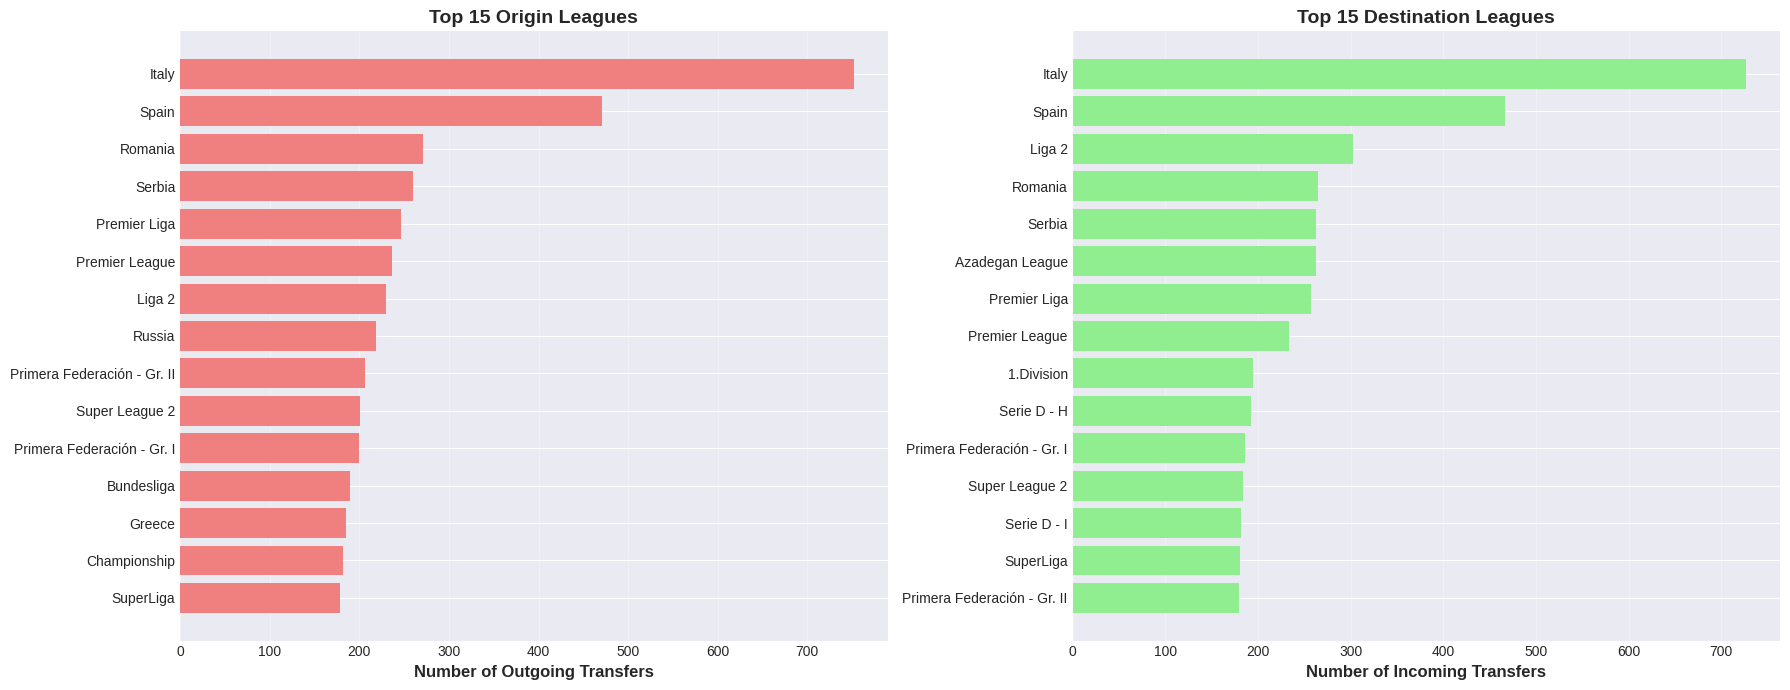

In [36]:
# Top leagues analysis
print("🏆 Top 15 Leagues by Transfer Activity:")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Origin leagues
top_origin_leagues = df_clean['league_origin_club'].value_counts().head(15)
axes[0].barh(top_origin_leagues.index, top_origin_leagues.values, color='lightcoral')
axes[0].set_xlabel('Number of Outgoing Transfers', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Origin Leagues', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

# Destination leagues
top_dest_leagues = df_clean['league_new_club'].value_counts().head(15)
axes[1].barh(top_dest_leagues.index, top_dest_leagues.values, color='lightgreen')
axes[1].set_xlabel('Number of Incoming Transfers', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Destination Leagues', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


🌍 Top 15 Countries by Transfer Activity:


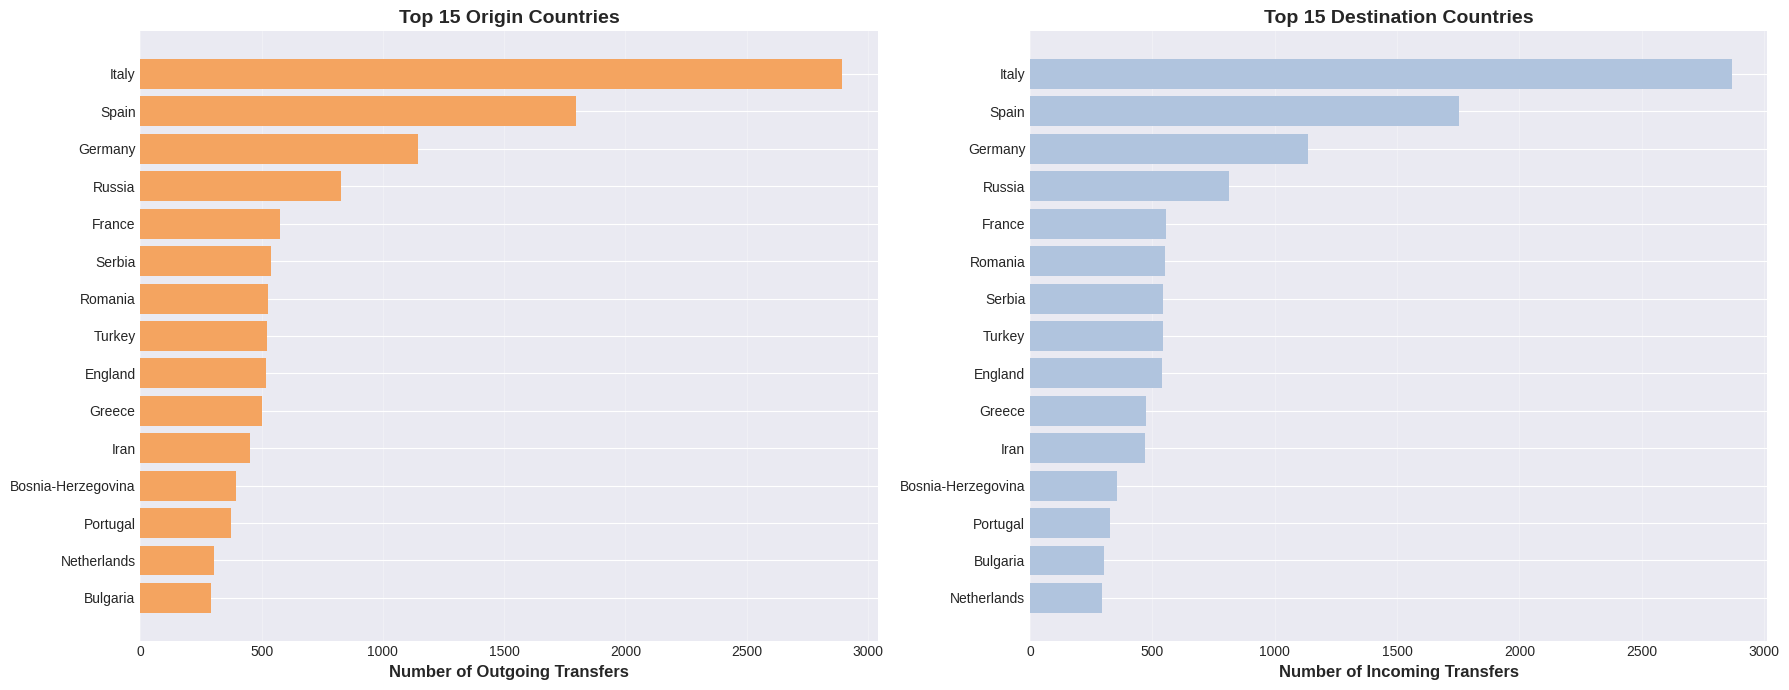

In [37]:
# Top countries analysis
print("\n🌍 Top 15 Countries by Transfer Activity:")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Origin countries
top_origin_countries = df_clean['country_origin_club'].value_counts().head(15)
axes[0].barh(top_origin_countries.index, top_origin_countries.values, color='sandybrown')
axes[0].set_xlabel('Number of Outgoing Transfers', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Origin Countries', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

# Destination countries
top_dest_countries = df_clean['country_new_club'].value_counts().head(15)
axes[1].barh(top_dest_countries.index, top_dest_countries.values, color='lightsteelblue')
axes[1].set_xlabel('Number of Incoming Transfers', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Destination Countries', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


🏟️ Top 15 Most Active Clubs:


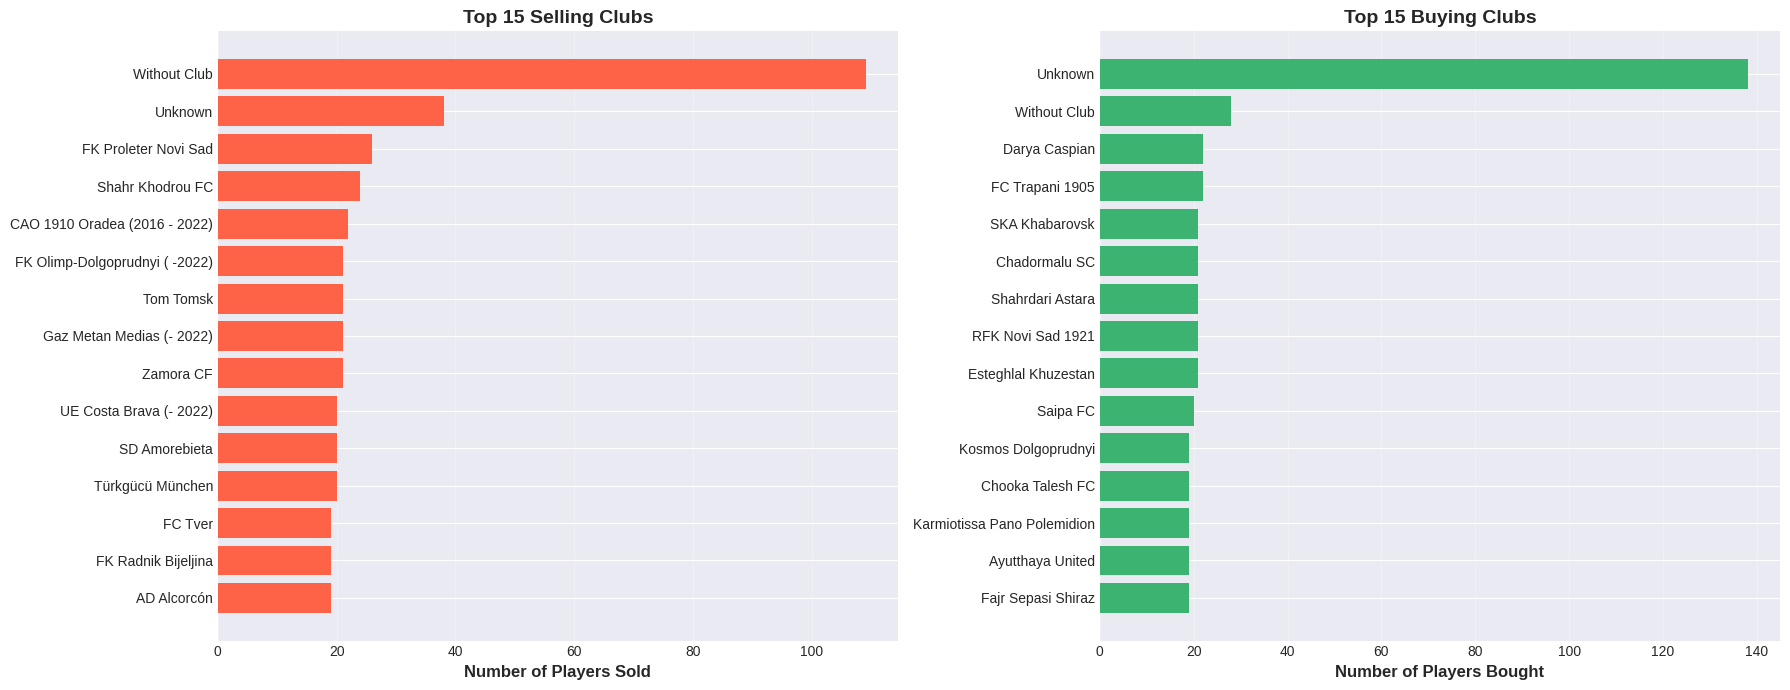

In [38]:
# Most active clubs
print("\n🏟️ Top 15 Most Active Clubs:")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Selling clubs
top_selling_clubs = df_clean['origin_club'].value_counts().head(15)
axes[0].barh(top_selling_clubs.index, top_selling_clubs.values, color='tomato')
axes[0].set_xlabel('Number of Players Sold', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Selling Clubs', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

# Buying clubs
top_buying_clubs = df_clean['new_club'].value_counts().head(15)
axes[1].barh(top_buying_clubs.index, top_buying_clubs.values, color='mediumseagreen')
axes[1].set_xlabel('Number of Players Bought', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Buying Clubs', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### 4.4 Temporal Analysis

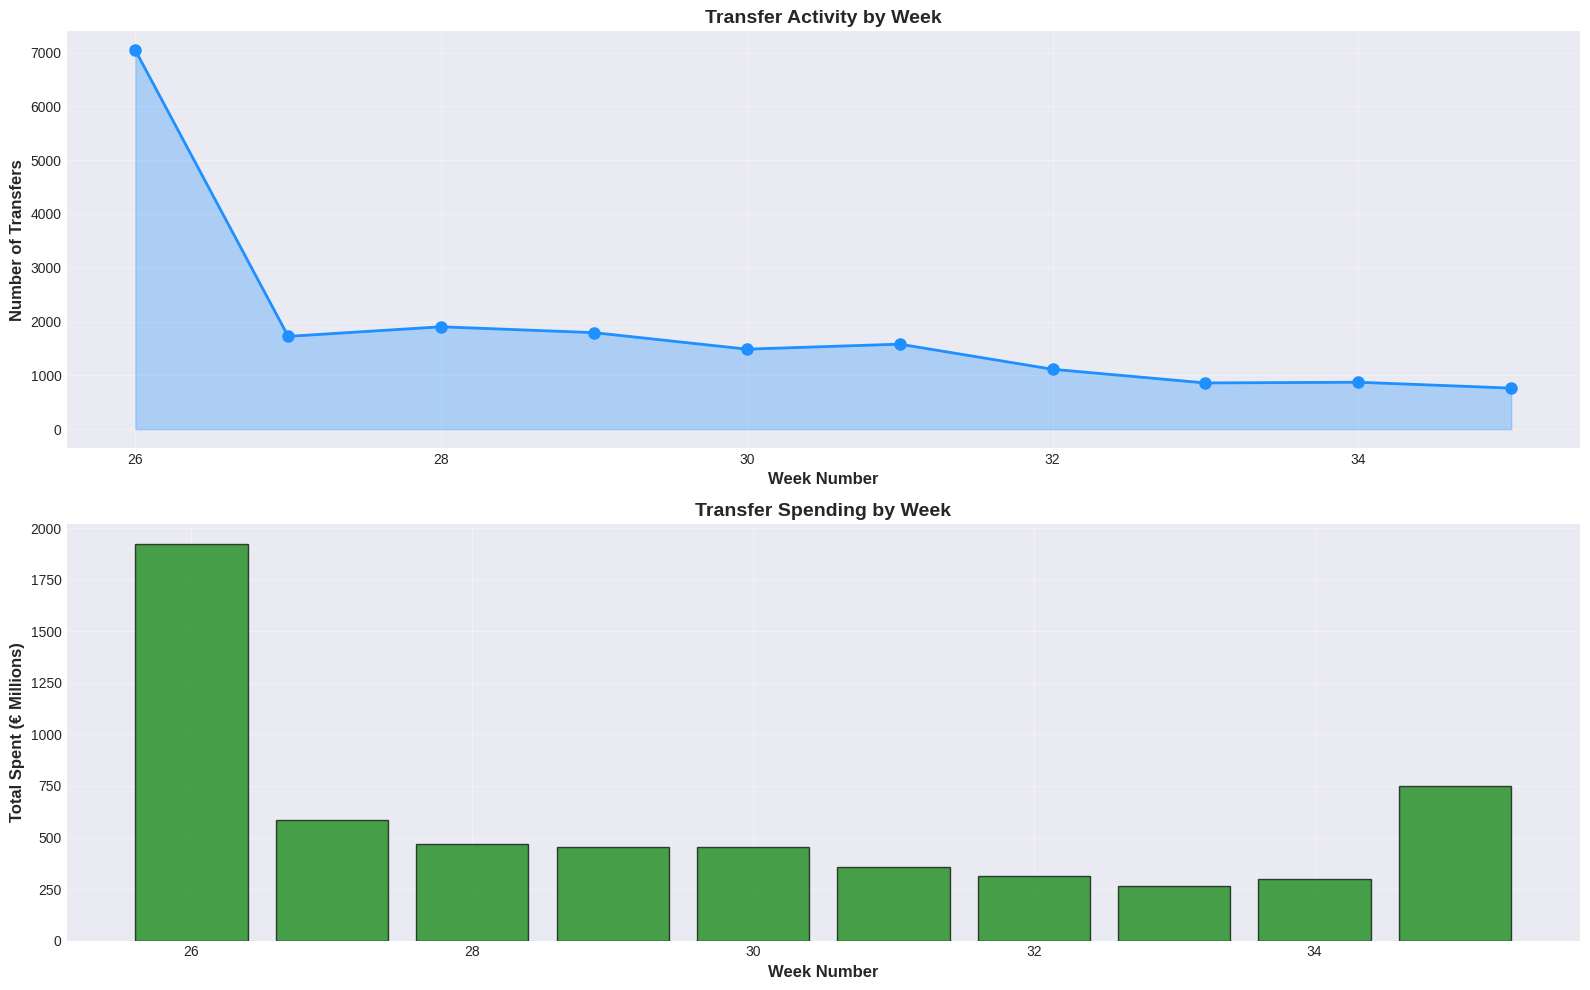


📅 Weekly Transfer Statistics:


,Number of Transfers,Total Spent
week_of_transfer,,
26,7043,1925293000
27,1725,582829000
28,1903,466765000
29,1794,455228000
30,1487,453950000
31,1580,357329000
32,1113,313404300
33,859,263905000
34,872,296748000


In [39]:
# Transfer activity by week
transfers_by_week = df_clean.groupby('week_of_transfer').agg({
    'name': 'count',
    'cost': 'sum'
}).rename(columns={'name': 'Number of Transfers', 'cost': 'Total Spent'})

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Number of transfers
axes[0].plot(transfers_by_week.index, transfers_by_week['Number of Transfers'], 
             marker='o', linewidth=2, markersize=8, color='dodgerblue')
axes[0].fill_between(transfers_by_week.index, transfers_by_week['Number of Transfers'], 
                      alpha=0.3, color='dodgerblue')
axes[0].set_xlabel('Week Number', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Transfers', fontsize=12, fontweight='bold')
axes[0].set_title('Transfer Activity by Week', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Total spending
axes[1].bar(transfers_by_week.index, transfers_by_week['Total Spent'] / 1_000_000, 
            color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Week Number', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Spent (€ Millions)', fontsize=12, fontweight='bold')
axes[1].set_title('Transfer Spending by Week', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📅 Weekly Transfer Statistics:")
display(transfers_by_week)

### 4.5 Transfer Types & Conditions

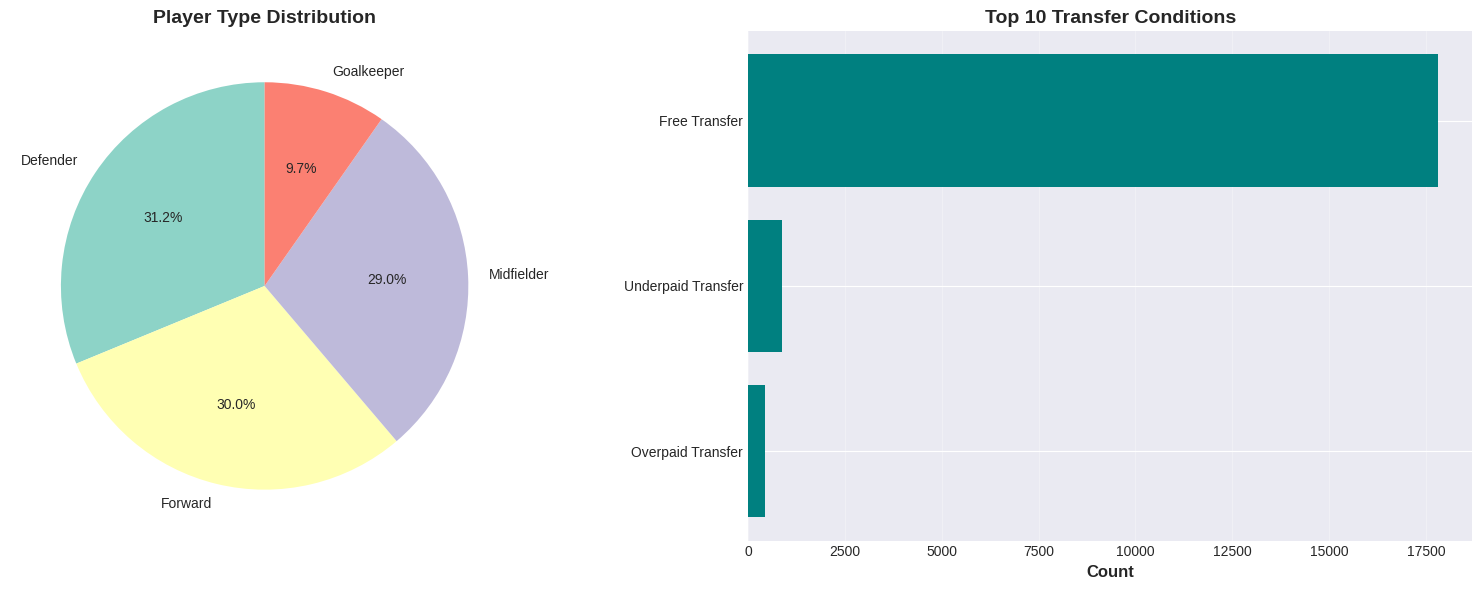


📊 Transfer Conditions:


Transfer Condition
Free Transfer         17813
Underpaid Transfer      881
Overpaid Transfer       445
Name: count, dtype: int64

In [40]:
# Player type distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Player Type
player_type_counts = df_clean['Player Type'].value_counts()
axes[0].pie(player_type_counts, labels=player_type_counts.index, autopct='%1.1f%%',
            startangle=90, colors=plt.cm.Set3.colors)
axes[0].set_title('Player Type Distribution', fontsize=14, fontweight='bold')

# Transfer Condition
transfer_condition_counts = df_clean['Transfer Condition'].value_counts().head(10)
axes[1].barh(transfer_condition_counts.index, transfer_condition_counts.values, color='teal')
axes[1].set_xlabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Top 10 Transfer Conditions', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n📊 Transfer Conditions:")
display(df_clean['Transfer Condition'].value_counts())

## 5. Advanced Insights

🔍 Analyzing Age vs Transfer Cost Relationship:

📊 Statistics by Age Group:


,Avg Cost,Median Cost,Total Spent,Number of Transfers
age_group,,,,
15-20,258522.00,0.00,708349000,2740
21-25,483687.00,0.00,3736964300,7726
26-30,219083.00,0.00,1241542000,5667
31-35,67648.00,0.00,177509000,2624
36+,0.00,0.00,0,381


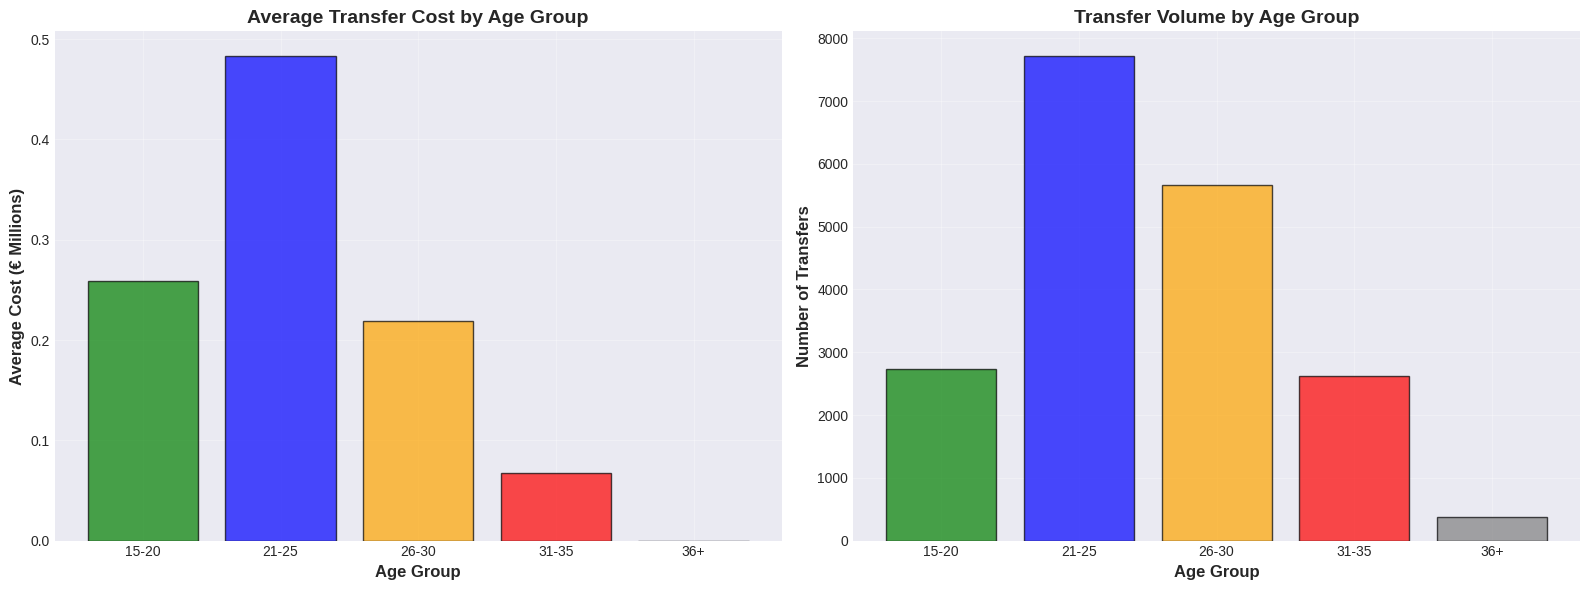

In [41]:
# Age vs Cost correlation
print("🔍 Analyzing Age vs Transfer Cost Relationship:")
print("="*60)

# Create age groups
df_clean['age_group'] = pd.cut(df_clean['age'], 
                                bins=[15, 20, 25, 30, 35, 50],
                                labels=['15-20', '21-25', '26-30', '31-35', '36+'])

age_analysis = df_clean.groupby('age_group').agg({
    'cost': ['mean', 'median', 'sum'],
    'name': 'count'
}).round(0)

age_analysis.columns = ['Avg Cost', 'Median Cost', 'Total Spent', 'Number of Transfers']

print("\n📊 Statistics by Age Group:")
display(age_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average cost by age group
axes[0].bar(age_analysis.index, age_analysis['Avg Cost'] / 1_000_000, 
            color=['green', 'blue', 'orange', 'red', 'gray'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Age Group', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Cost (€ Millions)', fontsize=12, fontweight='bold')
axes[0].set_title('Average Transfer Cost by Age Group', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Number of transfers by age group
axes[1].bar(age_analysis.index, age_analysis['Number of Transfers'], 
            color=['green', 'blue', 'orange', 'red', 'gray'], alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Age Group', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Transfers', fontsize=12, fontweight='bold')
axes[1].set_title('Transfer Volume by Age Group', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


💰 Top Spending Leagues:


,Total Spent (Millions),Avg Cost,Number of Transfers
league_new_club,,,
Premier League,2225.00,9549356.00,233
Serie A,705.83,4867793.00,145
Ligue 1,553.30,4649580.00,119
Bundesliga,519.33,3186074.00,163
LaLiga,502.69,4928333.00,102
Liga Portugal,168.94,1384754.00,122
Eredivisie,159.78,1664427.00,96
Jupiler Pro League,114.50,1205221.00,95
Süper Lig,97.66,668884.00,146


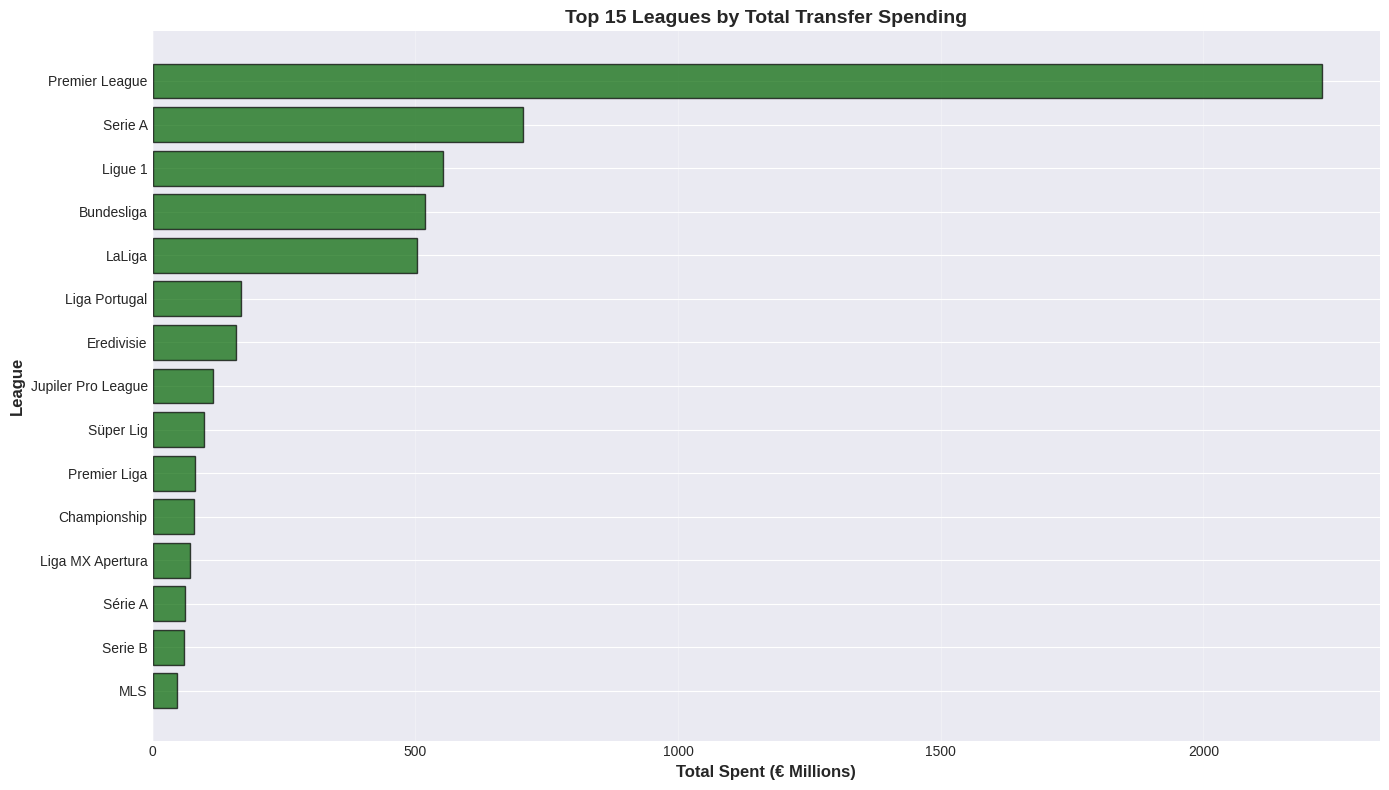

In [42]:
# League spending analysis
print("\n💰 Top Spending Leagues:")
print("="*60)

league_spending = df_clean.groupby('league_new_club').agg({
    'cost': ['sum', 'mean', 'count']
}).round(0)

league_spending.columns = ['Total Spent', 'Avg Cost', 'Number of Transfers']
league_spending = league_spending.sort_values('Total Spent', ascending=False).head(15)
league_spending['Total Spent (Millions)'] = league_spending['Total Spent'] / 1_000_000

display(league_spending[['Total Spent (Millions)', 'Avg Cost', 'Number of Transfers']])

# Visualization
plt.figure(figsize=(14, 8))
plt.barh(league_spending.index, league_spending['Total Spent (Millions)'], 
         color='darkgreen', alpha=0.7, edgecolor='black')
plt.xlabel('Total Spent (€ Millions)', fontsize=12, fontweight='bold')
plt.ylabel('League', fontsize=12, fontweight='bold')
plt.title('Top 15 Leagues by Total Transfer Spending', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [43]:
# Transfer flow between countries
print("\n🌐 Transfer Flow Analysis:")
print("="*60)

# Create transfer flow matrix for top countries
top_countries = pd.concat([
    df_clean['country_origin_club'].value_counts().head(10),
    df_clean['country_new_club'].value_counts().head(10)
]).index.unique()

transfer_flow = df_clean[
    (df_clean['country_origin_club'].isin(top_countries)) & 
    (df_clean['country_new_club'].isin(top_countries))
].groupby(['country_origin_club', 'country_new_club']).size().reset_index(name='count')

print("\n🔝 Top 20 Transfer Routes:")
display(transfer_flow.sort_values('count', ascending=False).head(20))


🌐 Transfer Flow Analysis:

🔝 Top 20 Transfer Routes:


,country_origin_club,country_new_club,count
8250,Italy,Italy,2684
15449,Spain,Spain,1562
6025,Germany,Germany,946
14007,Russia,Russia,738
13876,Romania,Romania,439
14664,Serbia,Serbia,439
16758,Turkey,Turkey,414
5633,France,France,406
6418,Greece,Greece,355
4717,England,England,342


## 6. Key Findings Summary

In [44]:
print("\n" + "="*80)
print("📊 KEY FINDINGS - Summer 2022 Transfer Window")
print("="*80)

print(f"\n1️⃣ OVERALL STATISTICS:")
print(f"   • Total Transfers: {len(df_clean):,}")
print(f"   • Total Money Spent: €{df_clean['cost'].sum():,.0f}")
print(f"   • Average Transfer Cost: €{df_clean['cost'].mean():,.0f}")
print(f"   • Free Transfers: {(df_clean['cost'] == 0).sum():,} ({(df_clean['cost'] == 0).sum()/len(df_clean)*100:.1f}%)")

print(f"\n2️⃣ PLAYER DEMOGRAPHICS:")
print(f"   • Average Age: {df_clean['age'].mean():.1f} years")
print(f"   • Most Common Position: {df_clean['position'].mode()[0]}")
print(f"   • Age Range: {df_clean['age'].min():.0f} - {df_clean['age'].max():.0f} years")

most_expensive = df_clean.nlargest(1, 'cost').iloc[0]
print(f"\n3️⃣ MOST EXPENSIVE TRANSFER:")
print(f"   • Player: {most_expensive['name']}")
print(f"   • From: {most_expensive['origin_club']}")
print(f"   • To: {most_expensive['new_club']}")
print(f"   • Cost: €{most_expensive['cost']:,.0f}")

print(f"\n4️⃣ TOP ACTIVE LEAGUE (Incoming):")
top_dest_league = df_clean['league_new_club'].value_counts().index[0]
print(f"   • {top_dest_league}")
print(f"   • Transfers: {df_clean['league_new_club'].value_counts().iloc[0]:,}")

print(f"\n5️⃣ TOP BUYING CLUB:")
top_buyer = df_clean['new_club'].value_counts().index[0]
print(f"   • {top_buyer}")
print(f"   • Players Bought: {df_clean['new_club'].value_counts().iloc[0]:,}")

print(f"\n6️⃣ PEAK TRANSFER WEEK:")
peak_week = df_clean['week_of_transfer'].value_counts().index[0]
print(f"   • Week {peak_week}")
print(f"   • Transfers: {df_clean['week_of_transfer'].value_counts().iloc[0]:,}")

print("\n" + "="*80)


📊 KEY FINDINGS - Summer 2022 Transfer Window

1️⃣ OVERALL STATISTICS:
   • Total Transfers: 19,139
   • Total Money Spent: €5,864,364,300
   • Average Transfer Cost: €306,409
   • Free Transfers: 17,813 (93.1%)

2️⃣ PLAYER DEMOGRAPHICS:
   • Average Age: 25.5 years
   • Most Common Position: Centre-Back
   • Age Range: 15 - 45 years

3️⃣ MOST EXPENSIVE TRANSFER:
   • Player: Antony
   • From: Ajax Amsterdam
   • To: Manchester United
   • Cost: €95,000,000

4️⃣ TOP ACTIVE LEAGUE (Incoming):
   • Italy
   • Transfers: 727

5️⃣ TOP BUYING CLUB:
   • Unknown
   • Players Bought: 138

6️⃣ PEAK TRANSFER WEEK:
   • Week 26
   • Transfers: 7,043



## 7. Export Cleaned Data

In [45]:
# Save cleaned dataset
output_filename = 'football_transfers_2022_cleaned.csv'
df_clean.to_csv(output_filename, index=False)

print(f"✅ Cleaned dataset saved as: {output_filename}")
print(f"📊 Final dataset shape: {df_clean.shape}")
print(f"💾 File size: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Cleaned dataset saved as: football_transfers_2022_cleaned.csv
📊 Final dataset shape: (19139, 22)
💾 File size: 7.39 MB


---

## 🎯 Conclusion

This notebook successfully :
- ✅ Cleaned and preprocessed the transfer market data
- ✅ Handled all missing values appropriately
- ✅ Removed duplicate records
- ✅ Performed comprehensive exploratory data analysis
- ✅ Generated insightful visualizations
- ✅ Extracted key findings from summer 2022 transfer window

---

**Author:** Mohamed Darwish  
**Date:** 2024  
**Dataset:** [Kaggle - Football Transfer Market Summer 2022](https://www.kaggle.com/datasets/darwish1337/football-transfer-market-of-the-2022-summer)